Type 2 Diabetes Hospital Readmission Data Science Project
by Likhitha Sindhu Geddam

In [13]:
!pip install numpy
!pip install matplotlib
!pip install seaborn
#myenv\Scripts\activate     # On Windows
!pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Likhitha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Likhitha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Likhitha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------- -------------------------- 20.5/60.8 kB ? eta -:--:--
     ------------- -------------------------- 20.5/60.8 kB ? eta -:--:--
     -------------------------------------- 60.8/60.8 kB 538.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/8.9 MB 1.7 MB/s eta 0:00:06
    --------------------------------------- 0.2/8.9 MB 2.2 MB/s eta 0:00:04
   - -------------------------------------- 0.3/8.9 MB 2.5 MB/s eta 0:00:04
   -- ------------------------------------- 0.5/8.9 MB 2.9 MB/s eta 0:00:03
   -- ------------------------------------- 0.5/8.9 MB 2.7 MB/s eta 0:00:04
   -- ------------------------------------- 0.5/8.9 MB 2.7 MB/s eta 0:00:04
   -- ------------------------------------- 0.5/8.9 MB 2.7 MB/s eta 0:00:04
   --- ------------------------------------ 0.8/8.9 MB 2.3 MB/s eta 0:00:04
   ---- -----------------


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Likhitha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [48]:
# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# ========================= 
# 1. LOAD DATA
# =========================
print("="*60)
print("LOADING DATA")
print("="*60)

df = pd.read_csv("data/diabetic_data.csv")
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nFirst few rows:\n{df.head()}")

LOADING DATA
Dataset shape: (101766, 50)

Columns: ['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']

First few rows:
   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Cauca

In [49]:
missing_summary = df.apply(lambda x: x.isin(['?', 'NA', 'N/A', 'na', 'n/a', 'null', 'Null']).sum())
print(missing_summary)

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [50]:
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].astype(str).unique())


Column: encounter_id
['2278392' '149190' '64410' ... '443854148' '443857166' '443867222']

Column: patient_nbr
['8222157' '55629189' '86047875' ... '140199494' '120975314' '175429310']

Column: race
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']

Column: gender
['Female' 'Male' 'Unknown/Invalid']

Column: age
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']

Column: weight
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']

Column: admission_type_id
['6' '1' '2' '3' '4' '5' '8' '7']

Column: discharge_disposition_id
['25' '1' '3' '6' '2' '5' '11' '7' '10' '4' '14' '18' '8' '13' '12' '16'
 '17' '22' '23' '9' '20' '15' '24' '28' '19' '27']

Column: admission_source_id
['1' '7' '2' '4' '5' '6' '20' '3' '17' '8' '9' '14' '10' '22' '11' '25'
 '13']

Column: time_in_hospital
['1' '3' '2' '4' '5' '13' '12' '9' '7' '10' '6' '11' '8' '14']

Column: payer_code
['?' 'MC' 'MD' 

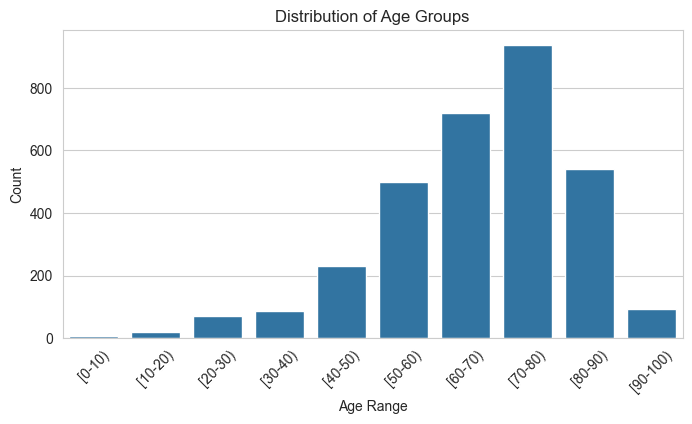

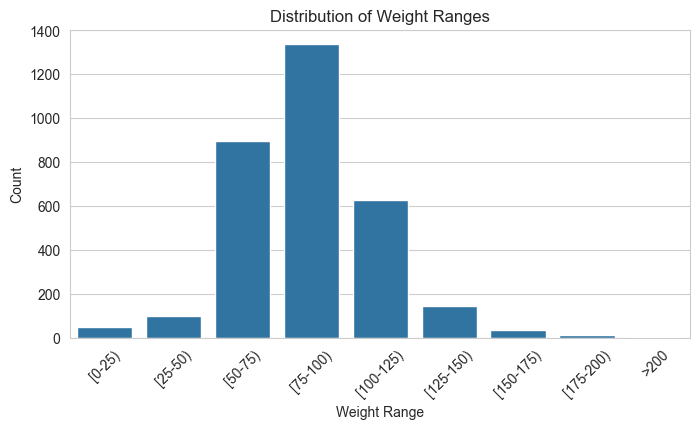

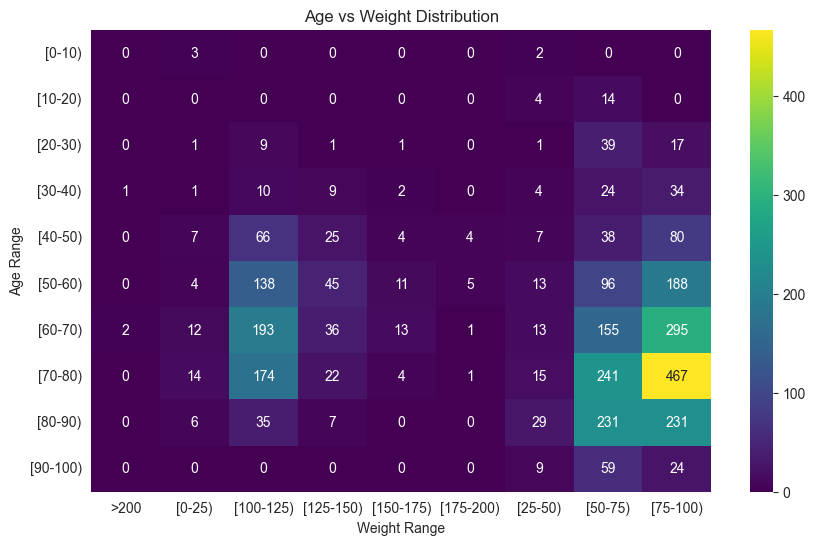

In [51]:
# Replace "?" with NaN
df = df.replace('?', pd.NA)

# Drop rows where age or weight is missing
df = df.dropna(subset=['age', 'weight'])

plt.figure(figsize=(8,4))
sns.countplot(data=df, x='age', order=sorted(df['age'].unique()))
plt.title('Distribution of Age Groups')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8,4))
sns.countplot(data=df, x='weight', order=[
    '[0-25)', '[25-50)', '[50-75)', '[75-100)', '[100-125)',
    '[125-150)', '[150-175)', '[175-200)', '>200'
])
plt.title('Distribution of Weight Ranges')
plt.xlabel('Weight Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Create a cross-tab (frequency table)
age_weight = pd.crosstab(df['age'], df['weight'])

plt.figure(figsize=(10,6))
sns.heatmap(age_weight, annot=True, fmt='d', cmap='viridis')
plt.title('Age vs Weight Distribution')
plt.xlabel('Weight Range')
plt.ylabel('Age Range')
plt.show()

gender
1    1648
2    1549
Name: count, dtype: Int64


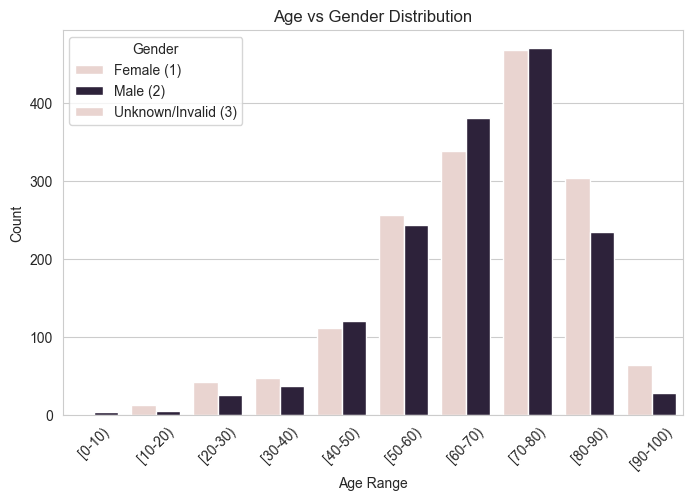

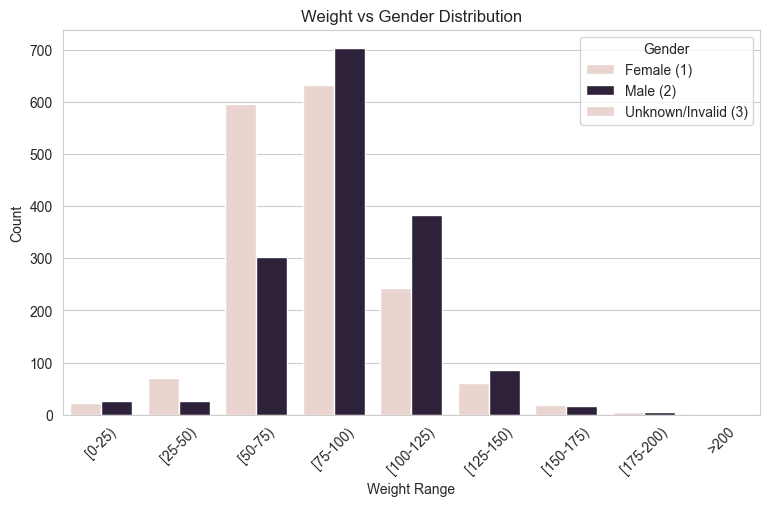

In [52]:
# Convert gender strings to lowercase and strip spaces
df['gender'] = df['gender'].str.lower().str.strip()

# Map to your numeric encoding
gender_map = {
    'female': 1,
    'male': 2,
    'unknown/invalid': 3  # match your data exactly
}

df['gender'] = df['gender'].map(gender_map).astype('Int64')

print(df['gender'].value_counts(dropna=False))

plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x='age',
    hue='gender',
    order=sorted(df['age'].unique())
)
plt.title('Age vs Gender Distribution')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.legend(
    title='Gender',
    labels=['Female (1)', 'Male (2)', 'Unknown/Invalid (3)']
)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(9,5))
sns.countplot(
    data=df,
    x='weight',
    hue='gender',
    order=['[0-25)', '[25-50)', '[50-75)', '[75-100)', 
           '[100-125)', '[125-150)', '[150-175)', 
           '[175-200)', '>200']
)
plt.title('Weight vs Gender Distribution')
plt.xlabel('Weight Range')
plt.ylabel('Count')
plt.legend(
    title='Gender',
    labels=['Female (1)', 'Male (2)', 'Unknown/Invalid (3)']
)
plt.xticks(rotation=45)
plt.show()


['>30' 'NO' '<30']


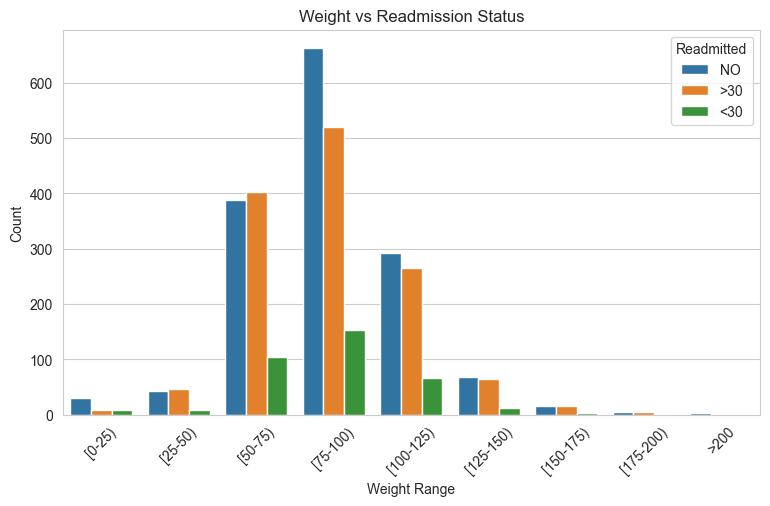

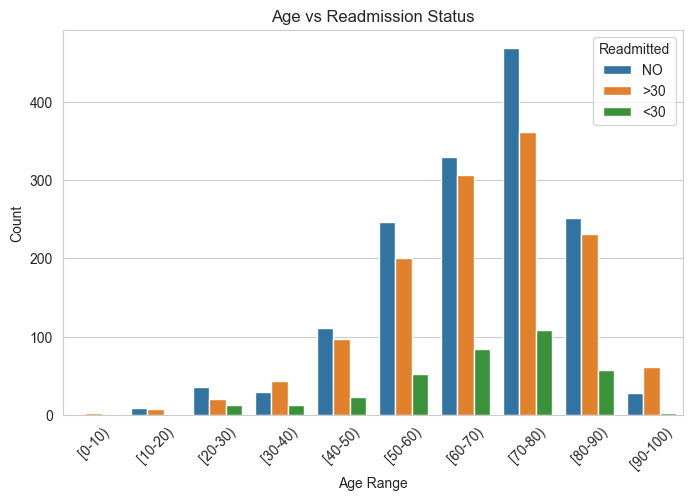

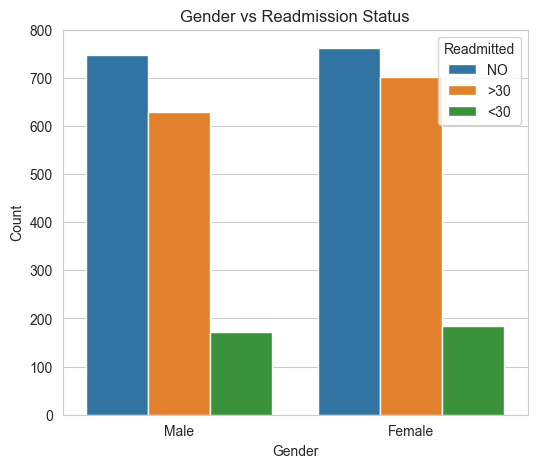

In [53]:
# Replace missing placeholders
df = df.replace(['?', 'NA', 'na', 'None', ''], pd.NA)

# Standardize readmitted column
df['readmitted'] = df['readmitted'].str.strip().str.upper()

# Check unique values
print(df['readmitted'].unique())

plt.figure(figsize=(9,5))
sns.countplot(
    data=df,
    x='weight',
    hue='readmitted',
    order=['[0-25)', '[25-50)', '[50-75)', '[75-100)', 
           '[100-125)', '[125-150)', '[150-175)', 
           '[175-200)', '>200']
)
plt.title('Weight vs Readmission Status')
plt.xlabel('Weight Range')
plt.ylabel('Count')
plt.legend(title='Readmitted', labels=['NO', '>30', '<30'])
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x='age',
    hue='readmitted',
    order=sorted(df['age'].unique())
)
plt.title('Age vs Readmission Status')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.legend(title='Readmitted', labels=['NO', '>30', '<30'])
plt.xticks(rotation=45)
plt.show()

gender_labels = {1: 'Female', 2: 'Male', 3: 'Unknown/Invalid'}
df['gender_label'] = df['gender'].map(gender_labels)

plt.figure(figsize=(6,5))
sns.countplot(
    data=df,
    x='gender_label',
    hue='readmitted'
)
plt.title('Gender vs Readmission Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Readmitted', labels=['NO', '>30', '<30'])
plt.show()

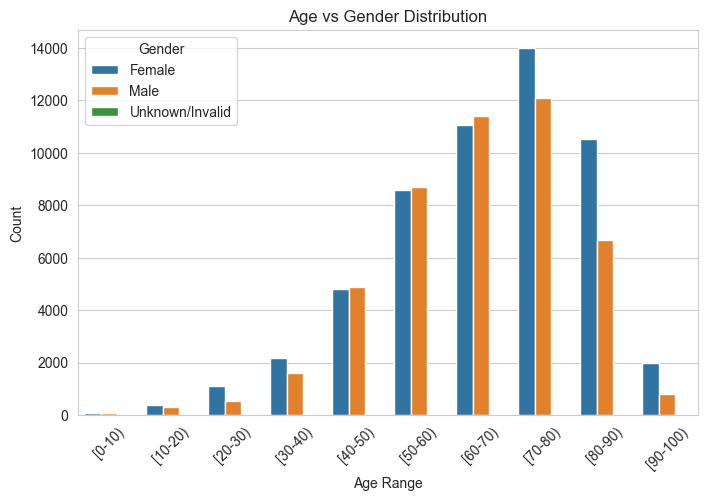

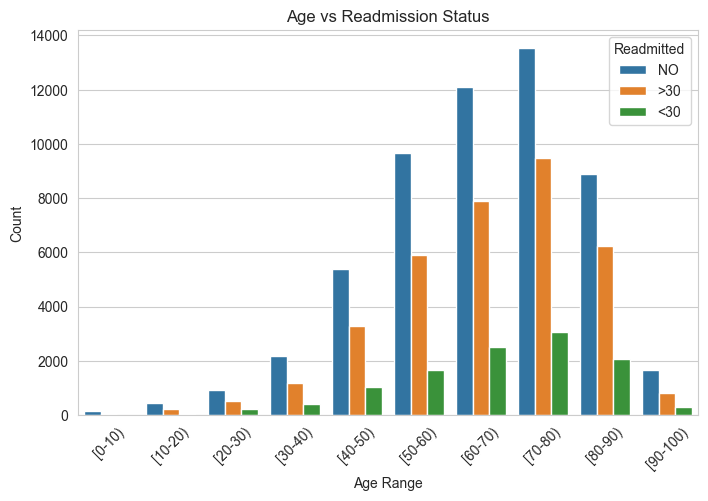

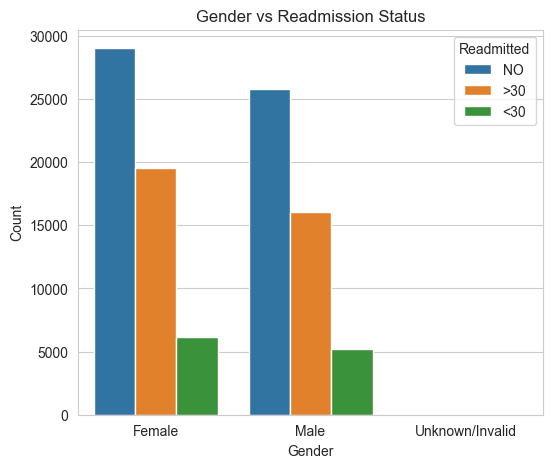

In [55]:
df = pd.read_csv("data/diabetic_data.csv")

df_new = df.drop('weight', axis=1)

# Clean column names (just in case)
df_new.columns = df_new.columns.str.lower().str.strip()

# Clean and standardize text values
df_new['age'] = df_new['age'].astype(str).str.strip()
df_new['readmitted'] = df_new['readmitted'].astype(str).str.strip().str.upper()
df_new['gender'] = df_new['gender'].astype(str).str.strip().str.lower()

# Map gender values to numbers
gender_map = {
    'female': 1,
    'male': 2,
    'unknown/invalid': 3
}
df_new['gender'] = df_new['gender'].map(gender_map).astype('Int64')

# Add readable gender label for plots
gender_labels = {1: 'Female', 2: 'Male', 3: 'Unknown/Invalid'}
df_new['gender_label'] = df_new['gender'].map(gender_labels)

plt.figure(figsize=(8,5))
sns.countplot(
    data=df_new,
    x='age',
    hue='gender_label',
    order=sorted(df['age'].unique())
)
plt.title('Age vs Gender Distribution')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(
    data=df_new,
    x='age',
    hue='readmitted',
    order=sorted(df['age'].unique())
)
plt.title('Age vs Readmission Status')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.legend(title='Readmitted', labels=['NO', '>30', '<30'])
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6,5))
sns.countplot(
    data=df_new,
    x='gender_label',
    hue='readmitted',
    order=['Female', 'Male', 'Unknown/Invalid']
)
plt.title('Gender vs Readmission Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Readmitted', labels=['NO', '>30', '<30'])
plt.show()

            Medical_Specialty  Count
0                           ?  49949
1            InternalMedicine  14635
2            Emergency/Trauma   7565
3      Family/GeneralPractice   7440
4                  Cardiology   5352
5             Surgery-General   3099
6                  Nephrology   1613
7                 Orthopedics   1400
8  Orthopedics-Reconstructive   1233
9                 Radiologist   1140


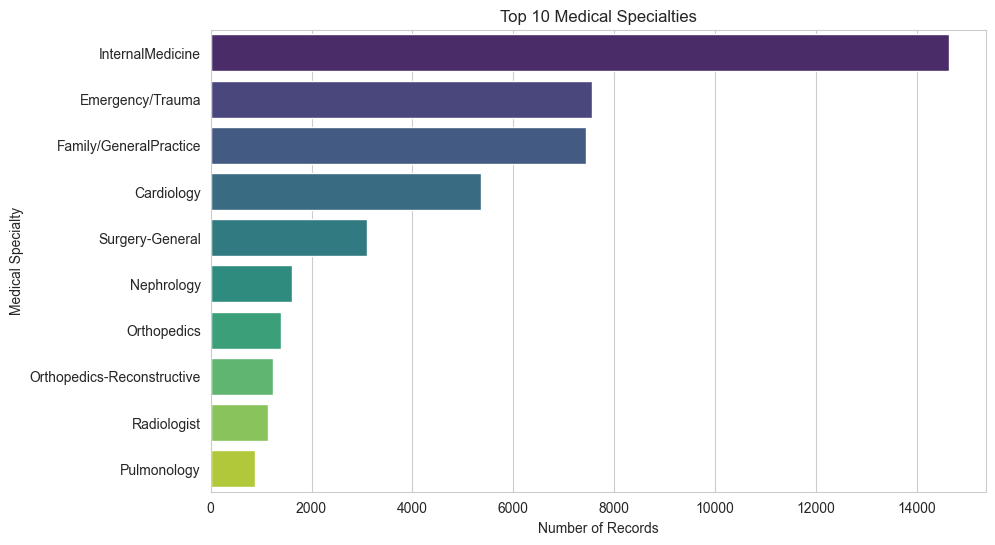

In [56]:
df = pd.read_csv("data/diabetic_data.csv")

df['medical_specialty'].value_counts(dropna=False)

df['medical_specialty'].value_counts(dropna=False).sort_index()

medical_counts = (
    df['medical_specialty']
    .value_counts(dropna=False)
    .reset_index()
)
medical_counts.columns = ['Medical_Specialty', 'Count']

print(medical_counts.head(10))  # show top 10

df['medical_specialty'] = df['medical_specialty'].replace('?', pd.NA)

df['medical_specialty'].value_counts(dropna=False)

top_specialties = df['medical_specialty'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(
    x=top_specialties.values,
    y=top_specialties.index,
    palette="viridis"
)
plt.title('Top 10 Medical Specialties')
plt.xlabel('Number of Records')
plt.ylabel('Medical Specialty')
plt.show()


          medical_specialty readmitted  count
0      AllergyandImmunology        <30      3
1      AllergyandImmunology        >30      3
2      AllergyandImmunology         NO      1
3            Anesthesiology        <30      1
4            Anesthesiology        >30      3
5            Anesthesiology         NO      8
6  Anesthesiology-Pediatric        <30      1
7  Anesthesiology-Pediatric        >30      5
8  Anesthesiology-Pediatric         NO     13
9                Cardiology        <30    425


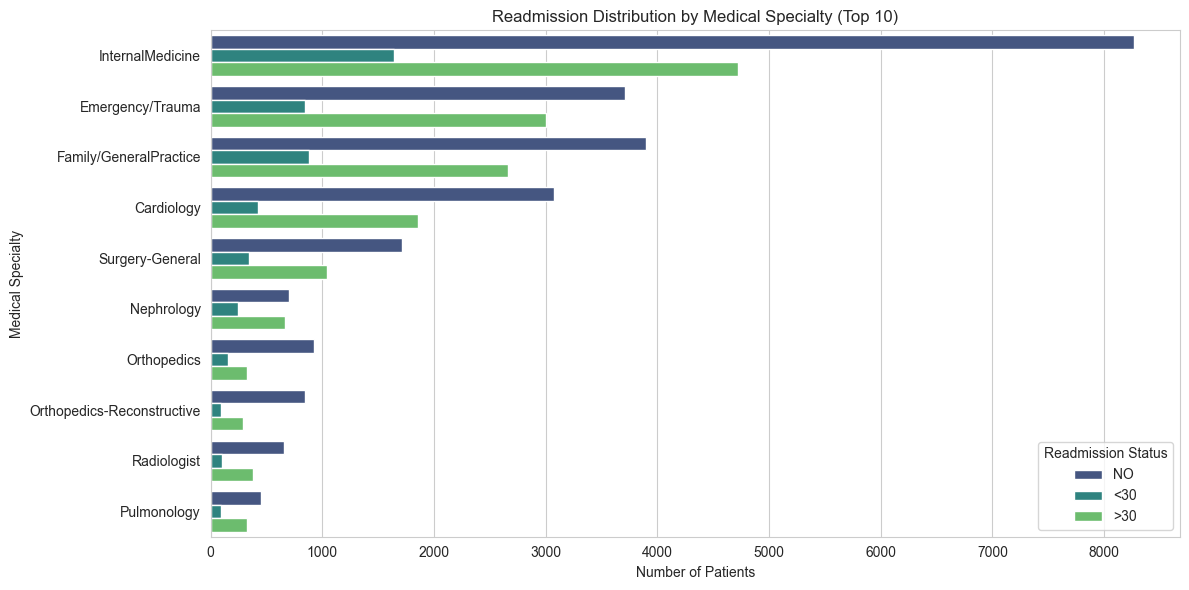

ValueError: cannot insert medical_specialty, already exists

In [57]:
readmit_counts = (
    df.groupby(['medical_specialty', 'readmitted'])
      .size()
      .reset_index(name='count')
      .sort_values(['medical_specialty', 'readmitted'])
)
print(readmit_counts.head(10))

# Get top 10 specialties by total count
top_specialties = (
    df['medical_specialty']
    .value_counts()
    .head(10)
    .index
)

# Filter data
filtered_df = df[df['medical_specialty'].isin(top_specialties)]

# Plot
plt.figure(figsize=(12, 6))
sns.countplot(
    data=filtered_df,
    y='medical_specialty',
    hue='readmitted',
    order=top_specialties,
    palette='viridis'
)
plt.title('Readmission Distribution by Medical Specialty (Top 10)')
plt.xlabel('Number of Patients')
plt.ylabel('Medical Specialty')
plt.legend(title='Readmission Status')
plt.tight_layout()
plt.show()

# Compute percentages
readmit_pct = (
    df.groupby(['medical_specialty', 'readmitted'])
      .size()
      .groupby(level=0)
      .apply(lambda x: 100 * x / x.sum())
      .reset_index(name='percentage')
)

# Plot top 10 specialties
top_specialties = df['medical_specialty'].value_counts().head(10).index
filtered_pct = readmit_pct[readmit_pct['medical_specialty'].isin(top_specialties)]

plt.figure(figsize=(12,6))
sns.barplot(
    data=filtered_pct,
    y='medical_specialty',
    x='percentage',
    hue='readmitted',
    palette='viridis'
)
plt.title('Readmission Percentage by Medical Specialty (Top 10)')
plt.xlabel('Percentage of Patients')
plt.ylabel('Medical Specialty')
plt.legend(title='Readmission Status')
plt.tight_layout()
plt.show()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# =========================
# 1. LOAD DATA
# =========================
print("="*60)
print("LOADING DATA")
print("="*60)

df = pd.read_csv("diabetic_data.csv")
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nFirst few rows:\n{df.head()}")

# =========================
# 2. FEATURE SELECTION FOR ANOMALY DETECTION
# =========================
print("\n" + "="*60)
print("FEATURE SELECTION FOR ANOMALY DETECTION")
print("="*60)

# Select features that indicate unusual patient encounters
# Focus on: utilization, procedures, medications, and outcomes

numeric_features = [
    # Hospital utilization (KEY indicators)
    "time_in_hospital",
    "num_lab_procedures",
    "num_procedures",
    "num_medications",
    "number_outpatient",
    "number_emergency",
    "number_inpatient",
    "number_diagnoses"
]

categorical_features = [
    "race",
    "gender",
    "age",  # age is categorical in this dataset (e.g., "[50-60)")
    "admission_type_id",
    "discharge_disposition_id",
    "admission_source_id",
    "max_glu_serum",
    "A1Cresult",
    "change",  # medication change
    "diabetesMed"  # diabetes medication prescribed
]

# Optional: Include medication features (many binary indicators)
medication_features = [
    "metformin", "repaglinide", "nateglinide", "chlorpropamide",
    "glimepiride", "glipizide", "glyburide", "pioglitazone",
    "rosiglitazone", "insulin"
]

# Combine all features
all_features = numeric_features + categorical_features + medication_features

print(f"\nSelected features for anomaly detection:")
print(f"  - Numeric features ({len(numeric_features)}): {numeric_features}")
print(f"  - Categorical features ({len(categorical_features)}): {categorical_features}")
print(f"  - Medication features ({len(medication_features)}): {medication_features}")
print(f"  - Total: {len(all_features)} features")

# Create working dataframe
df_anomaly = df[all_features + ['readmitted', 'encounter_id', 'patient_nbr']].copy()

# =========================
# 3. DATA PREPROCESSING
# =========================
print("\n" + "="*60)
print("PREPROCESSING")
print("="*60)

# Check for missing values represented as "?"
missing_check = df_anomaly.apply(lambda x: (x == "?").sum())
print(f"\nMissing values (represented as '?'):")
print(missing_check[missing_check > 0])

# Replace ? with NaN
df_anomaly = df_anomaly.replace("?", np.nan)

# Check data types
print(f"\nData types before conversion:")
print(df_anomaly.dtypes.value_counts())

# Drop rows with missing values in key features
initial_rows = len(df_anomaly)
df_anomaly = df_anomaly.dropna(subset=numeric_features + categorical_features)
print(f"\nDropped {initial_rows - len(df_anomaly)} rows with missing values")
print(f"Final dataset size: {df_anomaly.shape}")

# Separate features for encoding
X_numeric = df_anomaly[numeric_features].copy()
X_categorical = df_anomaly[categorical_features].copy()
X_medications = df_anomaly[medication_features].copy()

print(f"\nNumeric features shape: {X_numeric.shape}")
print(f"Categorical features shape: {X_categorical.shape}")
print(f"Medication features shape: {X_medications.shape}")

# =========================
# 4. ENCODE CATEGORICAL FEATURES
# =========================
print("\n" + "="*60)
print("ENCODING CATEGORICAL FEATURES")
print("="*60)

# Label encode categorical features (simpler for anomaly detection)
X_categorical_encoded = X_categorical.copy()
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    X_categorical_encoded[col] = le.fit_transform(X_categorical[col].astype(str))
    label_encoders[col] = le
    print(f"  {col}: {len(le.classes_)} unique values")

# Encode medication features (No/Yes/Steady/Up/Down -> numeric)
X_medications_encoded = X_medications.copy()
for col in medication_features:
    le = LabelEncoder()
    X_medications_encoded[col] = le.fit_transform(X_medications[col].astype(str))
    label_encoders[col] = le

# Combine all encoded features
X_combined = pd.concat([X_numeric, X_categorical_encoded, X_medications_encoded], axis=1)
print(f"\nCombined feature matrix shape: {X_combined.shape}")

# =========================
# 5. SCALE FEATURES
# =========================
print("\n" + "="*60)
print("SCALING FEATURES")
print("="*60)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined)
print(f"Scaled data shape: {X_scaled.shape}")
print(f"Mean: {X_scaled.mean():.6f}, Std: {X_scaled.std():.6f}")

# =========================
# 6. ISOLATION FOREST
# =========================
print("\n" + "="*60)
print("ISOLATION FOREST ANOMALY DETECTION")
print("="*60)

# Test different contamination rates
contamination_rates = [0.01, 0.05, 0.10]
if_results = {}

for contamination in contamination_rates:
    print(f"\n--- Testing contamination={contamination} ---")
    
    iso_forest = IsolationForest(
        contamination=contamination,
        random_state=42,
        n_estimators=100,
        max_samples='auto',
        n_jobs=-1
    )
    
    predictions = iso_forest.fit_predict(X_scaled)
    scores = iso_forest.score_samples(X_scaled)
    
    if_results[contamination] = {
        'model': iso_forest,
        'predictions': predictions,
        'scores': scores,
        'n_anomalies': np.sum(predictions == -1),
        'pct_anomalies': np.sum(predictions == -1) / len(predictions) * 100
    }
    
    print(f"Anomalies detected: {if_results[contamination]['n_anomalies']} "
          f"({if_results[contamination]['pct_anomalies']:.2f}%)")
    print(f"Score range: [{scores.min():.3f}, {scores.max():.3f}]")

# Use optimal contamination
optimal_contamination = 0.05
iso_forest = if_results[optimal_contamination]['model']
if_predictions = if_results[optimal_contamination]['predictions']
if_scores = if_results[optimal_contamination]['scores']

print(f"\n✅ Using contamination={optimal_contamination}")
print(f"Total anomalies (Isolation Forest): {np.sum(if_predictions == -1)}")

# =========================
# 7. LOCAL OUTLIER FACTOR (LOF)
# =========================
print("\n" + "="*60)
print("LOCAL OUTLIER FACTOR (LOF) ANOMALY DETECTION")
print("="*60)

# Test different n_neighbors
n_neighbors_values = [10, 20, 30]
lof_results = {}

for n_neighbors in n_neighbors_values:
    print(f"\n--- Testing n_neighbors={n_neighbors} ---")
    
    lof = LocalOutlierFactor(
        n_neighbors=n_neighbors,
        contamination=optimal_contamination,
        novelty=False,
        n_jobs=-1
    )
    
    predictions = lof.fit_predict(X_scaled)
    scores = lof.negative_outlier_factor_
    
    lof_results[n_neighbors] = {
        'model': lof,
        'predictions': predictions,
        'scores': scores,
        'n_anomalies': np.sum(predictions == -1),
        'pct_anomalies': np.sum(predictions == -1) / len(predictions) * 100
    }
    
    print(f"Anomalies detected: {lof_results[n_neighbors]['n_anomalies']} "
          f"({lof_results[n_neighbors]['pct_anomalies']:.2f}%)")
    print(f"Score range: [{scores.min():.3f}, {scores.max():.3f}]")

# Use optimal n_neighbors
optimal_neighbors = 20
lof = lof_results[optimal_neighbors]['model']
lof_predictions = lof_results[optimal_neighbors]['predictions']
lof_scores = lof_results[optimal_neighbors]['scores']

print(f"\n✅ Using n_neighbors={optimal_neighbors}")
print(f"Total anomalies (LOF): {np.sum(lof_predictions == -1)}")

# =========================
# 8. ADD RESULTS TO DATAFRAME
# =========================
print("\n" + "="*60)
print("ADDING ANOMALY FLAGS TO DATASET")
print("="*60)

df_anomaly['if_prediction'] = if_predictions
df_anomaly['if_score'] = if_scores
df_anomaly['if_anomaly'] = (if_predictions == -1).astype(int)

df_anomaly['lof_prediction'] = lof_predictions
df_anomaly['lof_score'] = lof_scores
df_anomaly['lof_anomaly'] = (lof_predictions == -1).astype(int)

# Create consensus column
both_anomaly = (df_anomaly['if_anomaly'] == 1) & (df_anomaly['lof_anomaly'] == 1)
df_anomaly['consensus_anomaly'] = both_anomaly.astype(int)

print(f"✅ Added anomaly flags to dataset")

# =========================
# 9. COMPARISON OF METHODS
# =========================
print("\n" + "="*60)
print("COMPARING ISOLATION FOREST vs LOF")
print("="*60)

only_if = (df_anomaly['if_anomaly'] == 1) & (df_anomaly['lof_anomaly'] == 0)
only_lof = (df_anomaly['if_anomaly'] == 0) & (df_anomaly['lof_anomaly'] == 1)
both_normal = (df_anomaly['if_anomaly'] == 0) & (df_anomaly['lof_anomaly'] == 0)

print(f"Both methods agree (Anomaly): {both_anomaly.sum()}")
print(f"Both methods agree (Normal): {both_normal.sum()}")
print(f"Only Isolation Forest: {only_if.sum()}")
print(f"Only LOF: {only_lof.sum()}")
print(f"\nAgreement rate: {(both_anomaly.sum() + both_normal.sum()) / len(df_anomaly) * 100:.2f}%")
print(f"High-confidence anomalies (consensus): {both_anomaly.sum()}")

# Comparison matrix
comparison_matrix = pd.DataFrame({
    'LOF Normal': [both_normal.sum(), only_if.sum()],
    'LOF Anomaly': [only_lof.sum(), both_anomaly.sum()]
}, index=['IF Normal', 'IF Anomaly'])

print("\nComparison Matrix:")
print(comparison_matrix)

# =========================
# 10. VISUALIZATIONS
# =========================
print("\n" + "="*60)
print("CREATING VISUALIZATIONS")
print("="*60)

# 10.1 Score distributions
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(if_scores, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].axvline(x=if_scores[if_predictions == -1].max(), 
                color='red', linestyle='--', linewidth=2, 
                label=f'Anomaly Threshold')
axes[0].set_xlabel('Anomaly Score', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Isolation Forest Score Distribution', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].hist(lof_scores, bins=50, edgecolor='black', alpha=0.7, color='coral')
axes[1].axvline(x=lof_scores[lof_predictions == -1].max(), 
                color='red', linestyle='--', linewidth=2,
                label='Anomaly Threshold')
axes[1].set_xlabel('Negative Outlier Factor', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('LOF Score Distribution', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('results/figures/anomaly_detection/score_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# 10.2 PCA Visualization
print("\nCreating PCA visualization...")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Isolation Forest
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], 
                           c=df_anomaly['if_anomaly'], 
                           cmap='RdYlGn_r', 
                           alpha=0.6, 
                           s=30,
                           edgecolors='black',
                           linewidth=0.3)
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)', fontsize=11)
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)', fontsize=11)
axes[0].set_title('Isolation Forest Anomalies', fontsize=13, fontweight='bold')
plt.colorbar(scatter1, ax=axes[0], label='Anomaly (1) vs Normal (0)')

# LOF
scatter2 = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], 
                           c=df_anomaly['lof_anomaly'], 
                           cmap='RdYlGn_r', 
                           alpha=0.6, 
                           s=30,
                           edgecolors='black',
                           linewidth=0.3)
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)', fontsize=11)
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)', fontsize=11)
axes[1].set_title('LOF Anomalies', fontsize=13, fontweight='bold')
plt.colorbar(scatter2, ax=axes[1], label='Anomaly (1) vs Normal (0)')

# Consensus
scatter3 = axes[2].scatter(X_pca[:, 0], X_pca[:, 1], 
                           c=df_anomaly['consensus_anomaly'], 
                           cmap='RdYlGn_r', 
                           alpha=0.6, 
                           s=30,
                           edgecolors='black',
                           linewidth=0.3)
axes[2].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)', fontsize=11)
axes[2].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)', fontsize=11)
axes[2].set_title('Consensus Anomalies (Both Methods)', fontsize=13, fontweight='bold')
plt.colorbar(scatter3, ax=axes[2], label='Anomaly (1) vs Normal (0)')

plt.tight_layout()
plt.savefig('results/figures/anomaly_detection/pca_anomalies.png', dpi=300, bbox_inches='tight')
plt.show()

# 10.3 Method comparison bar chart
fig, ax = plt.subplots(figsize=(10, 6))

categories = ['Both Methods\n(Consensus)', 'Only IF', 'Only LOF', 'Both Normal']
counts = [both_anomaly.sum(), only_if.sum(), only_lof.sum(), both_normal.sum()]
colors = ['#d62728', '#ff7f0e', '#ffcc00', '#2ca02c']

bars = ax.bar(categories, counts, color=colors, edgecolor='black', linewidth=2)
ax.set_ylabel('Number of Cases', fontsize=12)
ax.set_title('Anomaly Detection Method Comparison', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}\n({height/len(df_anomaly)*100:.1f}%)',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('results/figures/anomaly_detection/method_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# =========================
# 11. ANALYZE TOP ANOMALIES
# =========================
print("\n" + "="*60)
print("ANALYZING TOP ANOMALIES")
print("="*60)

# Get most anomalous cases
display_cols = numeric_features + ['readmitted', 'if_score', 'lof_score']

# Top 10 by Isolation Forest
top_if = df_anomaly[df_anomaly['if_anomaly'] == 1].nsmallest(10, 'if_score')
print("\n🔴 Top 10 Most Anomalous Cases (Isolation Forest):")
print(top_if[display_cols])

# Top 10 by LOF
top_lof = df_anomaly[df_anomaly['lof_anomaly'] == 1].nsmallest(10, 'lof_score')
print("\n🔴 Top 10 Most Anomalous Cases (LOF):")
print(top_lof[display_cols])

# Consensus anomalies
consensus_cases = df_anomaly[df_anomaly['consensus_anomaly'] == 1]
print(f"\n🔴 High-Confidence Anomalies (Consensus): {len(consensus_cases)}")
if len(consensus_cases) > 0:
    print(consensus_cases[display_cols].head(10))

# =========================
# 12. FEATURE ANALYSIS
# =========================
print("\n" + "="*60)
print("FEATURE ANALYSIS: ANOMALIES vs NORMAL")
print("="*60)

# Compare numeric features
feature_comparison = pd.DataFrame({
    'Feature': numeric_features,
    'Normal_Mean': [df_anomaly[df_anomaly['if_anomaly'] == 0][f].mean() for f in numeric_features],
    'Anomaly_Mean': [df_anomaly[df_anomaly['if_anomaly'] == 1][f].mean() for f in numeric_features],
})

feature_comparison['Difference'] = feature_comparison['Anomaly_Mean'] - feature_comparison['Normal_Mean']
feature_comparison['Pct_Difference'] = (feature_comparison['Difference'] / feature_comparison['Normal_Mean'] * 100).round(2)

print("\nNumeric Feature Comparison:")
print(feature_comparison.sort_values('Pct_Difference', key=abs, ascending=False))

# Visualize key differences
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

key_features = ['time_in_hospital', 'num_medications', 'number_emergency', 'number_diagnoses']

for idx, feature in enumerate(key_features):
    data_to_plot = [
        df_anomaly[df_anomaly['if_anomaly'] == 0][feature],
        df_anomaly[df_anomaly['if_anomaly'] == 1][feature]
    ]
    
    bp = axes[idx].boxplot(data_to_plot, labels=['Normal', 'Anomaly'], patch_artist=True)
    bp['boxes'][0].set_facecolor('#2ca02c')
    bp['boxes'][1].set_facecolor('#d62728')
    
    axes[idx].set_ylabel(feature.replace('_', ' ').title(), fontsize=11)
    axes[idx].set_title(f'{feature.replace("_", " ").title()} Distribution', fontsize=12, fontweight='bold')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('results/figures/anomaly_detection/feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# =========================
# 13. READMISSION ANALYSIS
# =========================
print("\n" + "="*60)
print("READMISSION ANALYSIS FOR ANOMALIES")
print("="*60)

readmit_normal = df_anomaly[df_anomaly['if_anomaly'] == 0]['readmitted'].value_counts()
readmit_anomaly = df_anomaly[df_anomaly['if_anomaly'] == 1]['readmitted'].value_counts()

print("\nReadmission counts (Normal patients):")
print(readmit_normal)
print("\nReadmission counts (Anomalous patients):")
print(readmit_anomaly)

# Calculate readmission rates
readmit_categories = ['<30', '>30', 'NO']
normal_rates = [readmit_normal.get(cat, 0) / len(df_anomaly[df_anomaly['if_anomaly'] == 0]) * 100 
                for cat in readmit_categories]
anomaly_rates = [readmit_anomaly.get(cat, 0) / len(df_anomaly[df_anomaly['if_anomaly'] == 1]) * 100 
                 for cat in readmit_categories]

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(readmit_categories))
width = 0.35

bars1 = ax.bar(x - width/2, normal_rates, width, label='Normal', color='#2ca02c', edgecolor='black')
bars2 = ax.bar(x + width/2, anomaly_rates, width, label='Anomaly', color='#d62728', edgecolor='black')

ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_title('Readmission Rates: Normal vs Anomalous Patients', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(readmit_categories)
ax.legend()
ax.grid(axis='y', alpha=0.3)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('results/figures/anomaly_detection/readmission_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# =========================
# 14. SAVE RESULTS
# =========================
print("\n" + "="*60)
print("SAVING RESULTS")
print("="*60)

# Save full dataset with anomaly flags
df_anomaly.to_csv('data/processed/anomaly_flagged_patients.csv', index=False)
print("✅ Saved: data/processed/anomaly_flagged_patients.csv")

# Save consensus anomalies only
if len(consensus_cases) > 0:
    consensus_cases.to_csv('results/tables/consensus_anomalies.csv', index=False)
    print("✅ Saved: results/tables/consensus_anomalies.csv")

# Save feature comparison
feature_comparison.to_csv('results/tables/anomaly_feature_analysis.csv', index=False)
print("✅ Saved: results/tables/anomaly_feature_analysis.csv")

# Save summary statistics
summary = pd.DataFrame({
    'Method': ['Isolation Forest', 'LOF', 'Consensus'],
    'N_Anomalies': [
        df_anomaly['if_anomaly'].sum(),
        df_anomaly['lof_anomaly'].sum(),
        df_anomaly['consensus_anomaly'].sum()
    ],
    'Percentage': [
        df_anomaly['if_anomaly'].mean() * 100,
        df_anomaly['lof_anomaly'].mean() * 100,
        df_anomaly['consensus_anomaly'].mean() * 100
    ]
})
summary.to_csv('results/tables/anomaly_detection_summary.csv', index=False)
print("✅ Saved: results/tables/anomaly_detection_summary.csv")

print("\n" + "="*60)
print("✨ ANOMALY DETECTION COMPLETE!")
print("="*60)
print(f"\n📊 Key Findings:")
print(f"  - Isolation Forest: {df_anomaly['if_anomaly'].sum():,} anomalies ({df_anomaly['if_anomaly'].mean()*100:.2f}%)")
print(f"  - LOF: {df_anomaly['lof_anomaly'].sum():,} anomalies ({df_anomaly['lof_anomaly'].mean()*100:.2f}%)")
print(f"  - Consensus: {df_anomaly['consensus_anomaly'].sum():,} anomalies ({df_anomaly['consensus_anomaly'].mean()*100:.2f}%)")
print(f"  - Agreement rate: {(both_anomaly.sum() + both_normal.sum()) / len(df_anomaly) * 100:.2f}%")
print(f"\n🎯 Next Steps:")
print(f"  1. Investigate consensus anomalies for data quality issues")
print(f"  2. Review high-risk cases with clinical experts")
print(f"  3. Consider ensemble anomaly detection for better accuracy")
print(f"  4. Integrate with clustering results for patient segmentation")